In [1]:
import pandas as pd

In [2]:
gastos = {'Ano': ['2007', '2008'],
          'Faculdade': [24400, 300],
          'Transporte': [5540, 4460],
          'Lazer': [4020, 2376],
          'Internet': [643, 562],
          'Cartão de Crédito': [7060, 3487],
          'Alimentação': [1929, 1433]
          }


In [3]:
dados = pd.DataFrame(data=gastos)
dados

,Ano,Faculdade,Transporte,Lazer,Internet,Cartão de Crédito,Alimentação
0,2007,24400,5540,4020,643,7060,1929
1,2008,300,4460,2376,562,3487,1433


In [4]:
dados = pd.melt(dados, id_vars=['Ano'], var_name='Categoria', value_name='Valor')
dados

,Ano,Categoria,Valor
0,2007,Faculdade,24400
1,2008,Faculdade,300
2,2007,Transporte,5540
3,2008,Transporte,4460
4,2007,Lazer,4020
5,2008,Lazer,2376
6,2007,Internet,643
7,2008,Internet,562
8,2007,Cartão de Crédito,7060
9,2008,Cartão de Crédito,3487


In [5]:
import matplotlib.pyplot as plt

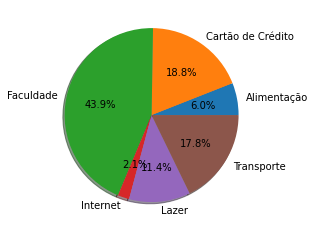

In [6]:
plt.pie(x=dados.groupby('Categoria').sum()['Valor'],
        labels=dados.groupby('Categoria').sum().index,
        autopct='%1.1f%%',
        shadow=True)
plt.show()

Os gráficos de pizza e comida não seão recomendados, contudos eles podem ser utilizados para dar uma idéia de unidade em dados estáticos. No caso do nosso dataFrame os dados não são estáticos, visto que não mudam com o ano, de forma que o gráfico de pizza mostrado no exemplo omite essa informação.

In [7]:
import seaborn as sns
dados.groupby('Categoria').sum().index

Index(['Alimentação', 'Cartão de Crédito', 'Faculdade', 'Internet', 'Lazer',
       'Transporte'],
      dtype='object', name='Categoria')

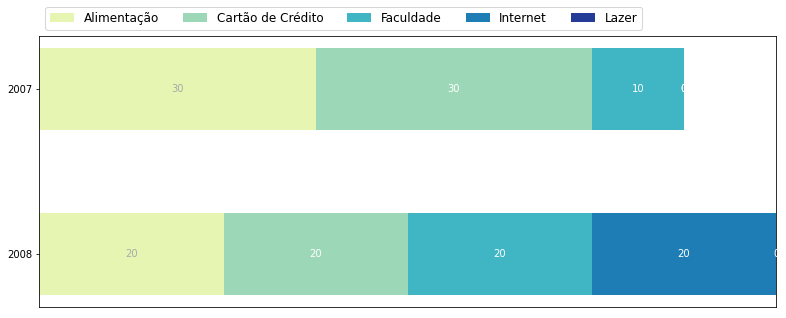

In [8]:
import numpy as np

results = {'2007': [30,30,10,0,0],
           '2008': [20,20,20,20,0]
           }

category_names = dados.groupby('Categoria').sum().index

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('YlGnBu')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(13.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax

survey(results, category_names)
plt.show()

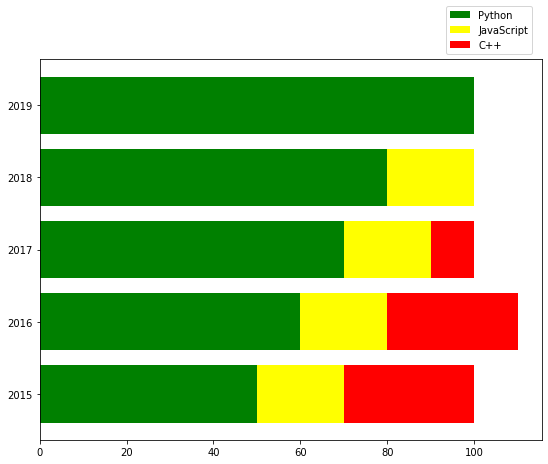

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data1=[30,30,10,0,0]
data2=[20,20,20,20,0]
data3=[50,60,70,80,100]


year=["2015","2016","2017","2018","2019"]

plt.figure(figsize=(9,7))
plt.barh(year,data3,color="green",label="Python")
plt.barh(year,data2,color="yellow",left=np.array(data3),label="JavaScript")
plt.barh(year,data1,color="red",left=np.array(data3)+np.array(data2),label="C++")

plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dados

,Ano,Categoria,Valor
0,2007,Faculdade,24400
1,2008,Faculdade,300
2,2007,Transporte,5540
3,2008,Transporte,4460
4,2007,Lazer,4020
5,2008,Lazer,2376
6,2007,Internet,643
7,2008,Internet,562
8,2007,Cartão de Crédito,7060
9,2008,Cartão de Crédito,3487


<ipython-input-12-906741ee7aad>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.groupby(y).sum().index)


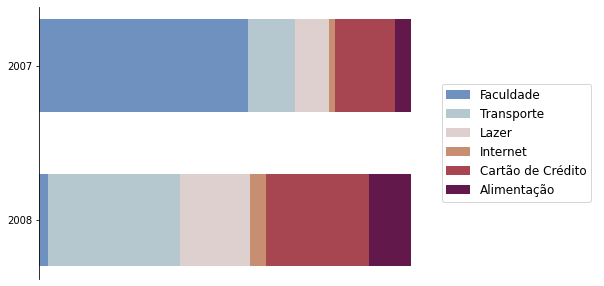

In [12]:

def barplot (data, x, y, hue):
    fig, ax = plt.subplots(figsize=(10,5))    
    # Inverte o eixo y para ficar em ordem decrescente 
    ax.invert_yaxis()
    # Remove o eixo x
    ax.xaxis.set_visible(False)

    # Calcula o total por categoria
    total = data.groupby(y).sum()[x]
    afastamento = 0

    cores = plt.get_cmap('twilight_shifted')(
        np.linspace(0.3, 0.9, data[hue].unique().shape[0]))

    for (categoria, cor) in zip(data[hue].unique(), cores):
        # Cria uma série com índice igual à variável y e valores igual à x, para uma mesma categoria de dado
        valores = data[(data[hue] == categoria)].groupby(y).sum()[x]

        #Cria um gŕafico de barra horizontal, sendo que cada categoria iniciará quando terminar a anterior
        ax.barh(valores.index, valores.values/total, left=afastamento, height=0.6, color=cor)
        afastamento += valores.values/total
    ax.set_yticklabels(data.groupby(y).sum().index)
    ax.legend(data[hue].unique(), fontsize=12, loc = 'center right')
    ax.set_xlim(0, 1.5)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    return fig, ax

barplot(data=dados, x='Valor', y='Ano', hue='Categoria')


plt.show()

In [15]:
gastos2 = {'Ano': [2017, 2018, 2016, 2015, 2014],
           'Transporte': [5540, 4460, 4448, 4529, 4432],
           'Lazer': [4020, 2376, 3000, 3250, 2200],
           'Internet': [643, 562, 600, 540, 520],
           'Cartão de crédito': [7060, 3487, 2654, 1298, 2021],
           'Alimentação': [1929, 1243, 1821, 1347, 1872],
           'Treino': [150, 130, 180, 150, 150],
           'Aluguel': [900, 900, 900, 900, 900]
           }

In [37]:
dados2 = pd.DataFrame(data=gastos2)
dados2.sort_values(by='Ano', inplace=True)
dados2

,Ano,Transporte,Lazer,Internet,Cartão de crédito,Alimentação,Treino,Aluguel
4,2014,4432,2200,520,2021,1872,150,900
3,2015,4529,3250,540,1298,1347,150,900
2,2016,4448,3000,600,2654,1821,180,900
0,2017,5540,4020,643,7060,1929,150,900
1,2018,4460,2376,562,3487,1243,130,900


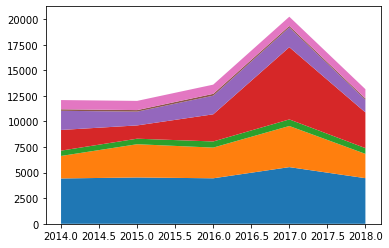

In [41]:
plt.stackplot(dados2['Ano'], dados2['Transporte'], dados2['Lazer'], dados2['Internet'], dados2['Cartão de crédito'], dados2['Alimentação'], dados2['Treino'], dados2['Aluguel'])